In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")


In [2]:
df = pd.read_csv("C://Users/admin/Downloads/archive (1)/laptops.csv")

In [3]:
df.head()

Unnamed: 0                                              title    price  \
0           0  DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...  ₹37,990   
1           1  HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...  ₹35,490   
2           2  Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...  ₹33,999   
3           3  HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...  ₹45,490   
4           4  ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...  ₹33,990   

         discount                                          Processor  \
0  ₹58,48935% off  Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...   
1  ₹47,20624% off                 Intel Core i3 Processor (11th Gen)   
2  ₹59,76043% off                 Intel Core i3 Processor (11th Gen)   
3  ₹56,26019% off                 Intel Core i3 Processor (12th Gen)   
4  ₹45,99026% off                 Intel Core i3 Processor (10th Gen)   

                                             RAM  \
0  RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD   
1                                  8 GB DDR4 RAM   
2                                  8 GB DDR4 RAM   
3                                  8 GB DDR4 RAM   
4                                  8 GB DDR4 RAM   

                                                  OS  \
0  Graphics & Keyboard: Integrated & Standard Key...   
1                 64 bit Windows 11 Operating System   
2                 64 bit Windows 11 Operating System   
3                 64 bit Windows 11 Operating System   
4                 64 bit Windows 11 Operating System   

                                       SSD  \
0  Display: 15.6" FHD WVA AG Narrow Border   
1                               256 GB SSD   
2                               512 GB SSD   
3                               512 GB SSD   
4                               512 GB SSD   

                              Display                           In_build_sw  \
0  Intel Core i3 Processor (11th Gen)                                   NaN   
1          35.56 cm (14 inch) Display                                   NaN   
2        39.62 cm (15.6 Inch) Display                                    No   
3        39.62 cm (15.6 Inch) Display  Microsoft Office Home & Student 2021   
4        39.62 cm (15.6 inch) Display          Office Home and Student 2021   

                                            warranty  
0                                      8 GB DDR4 RAM  
1                             1 Year Onsite Warranty  
2  1 Year Onsite Warranty + 1 Year Accidental Dam...  
3                             1 Year Onsite Warranty  
4                             1 Year Onsite Warranty

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   920 non-null    int64 
 1   title        920 non-null    object
 2   price        920 non-null    object
 3   discount     831 non-null    object
 4   Processor    920 non-null    object
 5   RAM          920 non-null    object
 6   OS           920 non-null    object
 7   SSD          920 non-null    object
 8   Display      920 non-null    object
 9   In_build_sw  357 non-null    object
 10  warranty     906 non-null    object
dtypes: int64(1), object(10)
memory usage: 79.2+ KB


<AxesSubplot:>

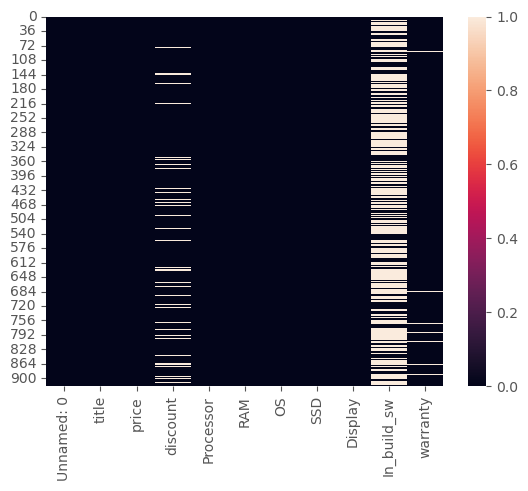

In [5]:
sns.heatmap(df.isnull())

In [7]:
import neattext as nt 
import re
def clean_currency(x):
  x = nt.remove_punctuations(x)
  x = nt.remove_currency_symbols(x)
  x = re.search("\d*",x)[0]
  return x

## Price

In [8]:
df['price']=df['price'].apply(lambda x: clean_currency(x))


In [9]:
df['price'].isnull().sum()

0

In [10]:
df['dis_clean']=df['discount'].fillna('0').apply(lambda x: clean_currency(x))

In [11]:
df['dis_clean'].isnull().sum()

0

In [12]:
def get_orginal_price(x,y):
  def discount_formula(p,d):
    k = p*(d/100)
    return int(np.abs(p-k))

  x,y=int(x),int(y)
  if y==0: return x,0
  elif np.abs(x-y)<10000: return x,0
  else:
    org = 0
    dis = 0
    for i in range(-2,0,1): 
      tmp_y = int(str(y)[:i])
      dis =  int(str(y)[i:])
      #print(discount_formula(tmp_y,dis),x)
      if np.abs(discount_formula(tmp_y,dis)-x)<10000:
        org =  tmp_y
        break
    return pd.Series([org,dis])




In [13]:
price_df = df[['price','dis_clean']].apply(lambda x: get_orginal_price(x[0],x[1]),axis=1).rename(columns={0:"Org_price",1:"Discount"})

<AxesSubplot:>

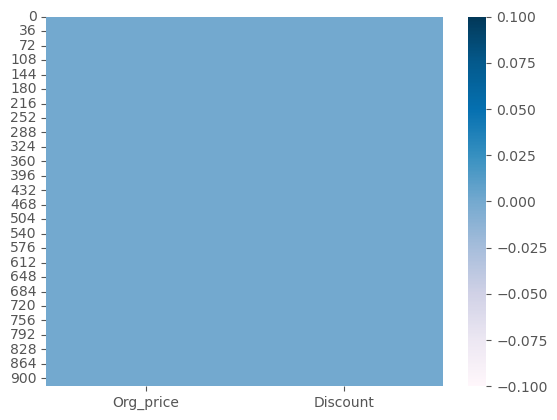

In [14]:
sns.heatmap(price_df.isnull(),cmap='PuBu')

In [15]:
df = df[['title', 'price', 'Processor', 'RAM', 'OS',
       'SSD', 'Display', 'In_build_sw', 'warranty']]

In [16]:
df = pd.concat([df,price_df],axis=1)

In [17]:
df.head()

title  price  \
0  DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...  37990   
1  HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...  35490   
2  Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...  33999   
3  HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...  45490   
4  ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...  33990   

                                           Processor  \
0  Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...   
1                 Intel Core i3 Processor (11th Gen)   
2                 Intel Core i3 Processor (11th Gen)   
3                 Intel Core i3 Processor (12th Gen)   
4                 Intel Core i3 Processor (10th Gen)   

                                             RAM  \
0  RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD   
1                                  8 GB DDR4 RAM   
2                                  8 GB DDR4 RAM   
3                                  8 GB DDR4 RAM   
4                                  8 GB DDR4 RAM   

                                                  OS  \
0  Graphics & Keyboard: Integrated & Standard Key...   
1                 64 bit Windows 11 Operating System   
2                 64 bit Windows 11 Operating System   
3                 64 bit Windows 11 Operating System   
4                 64 bit Windows 11 Operating System   

                                       SSD  \
0  Display: 15.6" FHD WVA AG Narrow Border   
1                               256 GB SSD   
2                               512 GB SSD   
3                               512 GB SSD   
4                               512 GB SSD   

                              Display                           In_build_sw  \
0  Intel Core i3 Processor (11th Gen)                                   NaN   
1          35.56 cm (14 inch) Display                                   NaN   
2        39.62 cm (15.6 Inch) Display                                    No   
3        39.62 cm (15.6 Inch) Display  Microsoft Office Home & Student 2021   
4        39.62 cm (15.6 inch) Display          Office Home and Student 2021   

                                            warranty  Org_price  Discount  
0                                      8 GB DDR4 RAM      58489        35  
1                             1 Year Onsite Warranty      47206        24  
2  1 Year Onsite Warranty + 1 Year Accidental Dam...      59760        43  
3                             1 Year Onsite Warranty      56260        19  
4                             1 Year Onsite Warranty      45990        26

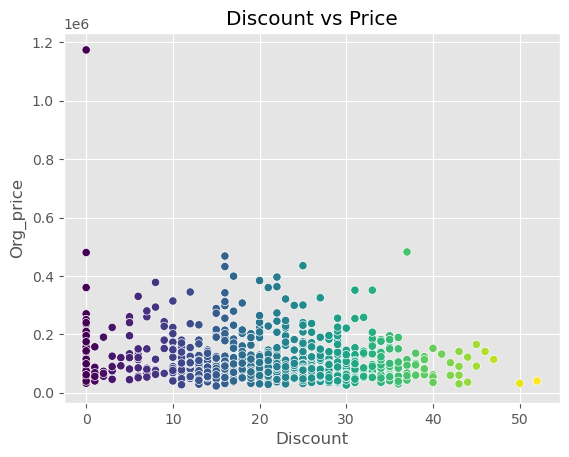

In [18]:
sns.scatterplot(x=df['Discount'],y=df['Org_price'].astype('int'),c=df['Discount'])
plt.title("Discount vs Price")
plt.show()

## OS ANALYSIS

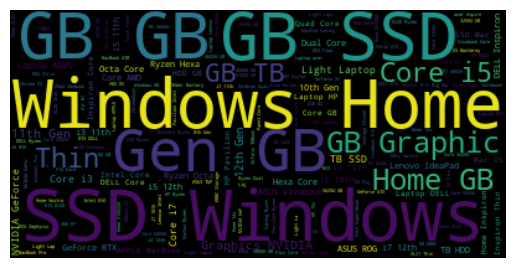

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df.title.values.tolist())
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:>

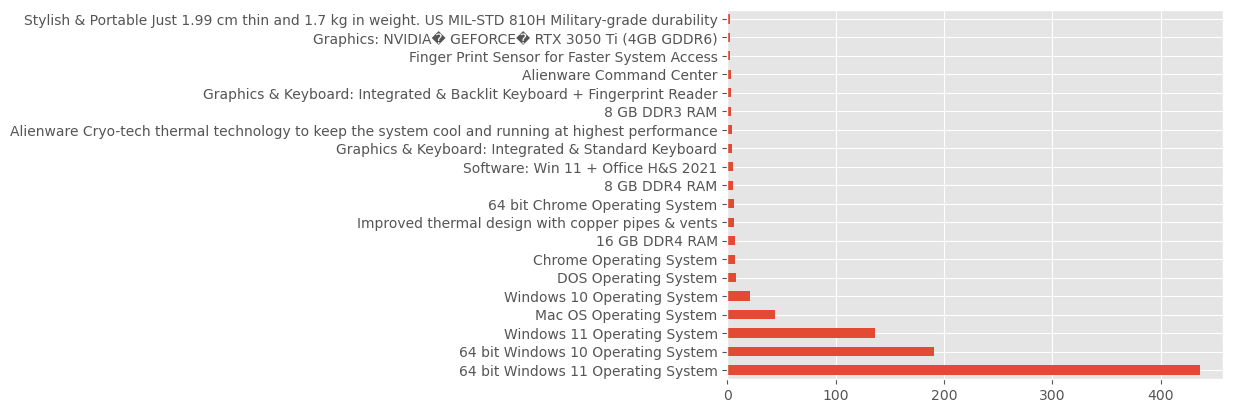

In [20]:
df['OS'].value_counts()[:20].plot(kind='barh')

In [21]:
os = list(map(str.lower,['Windows 11','Windows 10','Mac OS',"DOS","Chrome"]))
stopwords_os  = ['64 bit','operating system']
def remove_stopwords_os(x):
  x =  x.lower()
  for stopwords in stopwords_os:
    if stopwords.lower() in x:
      x = x.replace(stopwords,'')
  return x.lower().strip()



In [22]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection) / len(union)

def get_os(x):
  query = remove_stopwords_os(x)
  max_sim=0.5
  word = 0
  for document in os:
      similarity = jaccard_similarity(query, document)
      if similarity > max_sim:
          word =  document
          max_sim = similarity
          if max_sim==1: break
  if word==0: word='other'
  return word


In [23]:
df1 = df.copy()

In [24]:
df['OS']=df['OS'].apply(lambda x: get_os(x))

In [25]:
df['OS'].isnull().sum()

0

<AxesSubplot:>

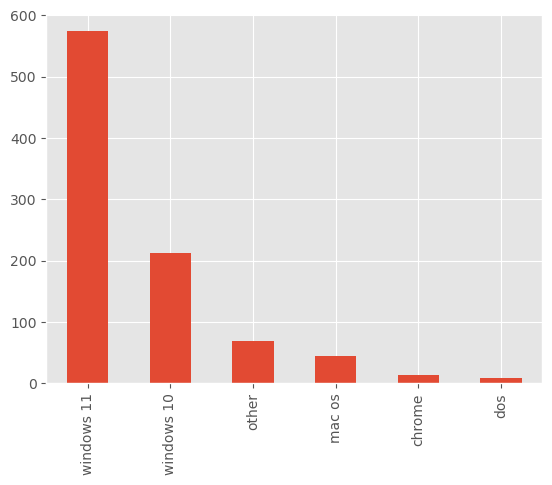

In [26]:
df['OS'].value_counts().plot(kind='bar')

## Price Vs OS

<AxesSubplot:ylabel='OS'>

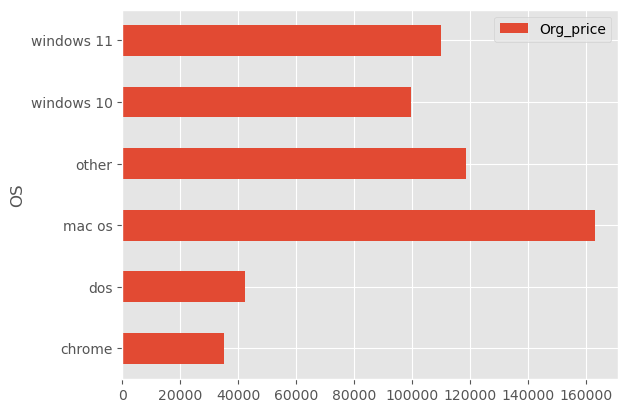

In [27]:
df[['OS','Org_price']].groupby('OS').mean().plot(kind='barh')

## Discount vs  OS

<AxesSubplot:ylabel='OS'>

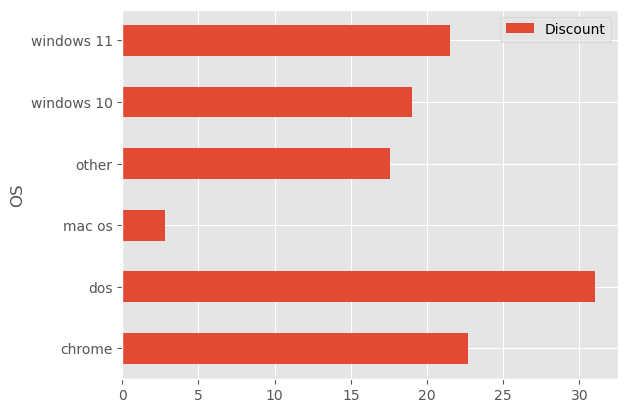

In [28]:
df[['OS','Discount']].groupby('OS').mean().plot(kind='barh')

## SSD

In [29]:
df['SSD'].unique()

array(['Display: 15.6" FHD WVA AG Narrow Border', '256 GB SSD',
       '512 GB SSD', '1 TB HDD|256 GB SSD', '128 GB SSD', '1 TB HDD',
       'Display: 15.6" FHD WVA AG 120Hz 250 nits Narrow Border',
       '1 TB SSD', '35.56 cm (14 Inch) Display',
       '2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 Slot',
       '39.62 cm (15.6 inch) Display',
       'Light Laptop without Optical Disk Drive',
       'Display: 14.0" FHD WVA AG Narrow Border',
       'Intel Core i5 Processor (11th Gen)',
       'Display: 14.0" FHD+ WVA Truelife Touch Narrow Border 250 nits, Dell Active Pen',
       'Software: Win 11 + Office H&S 2021',
       'Display: 15.6" FHD WVA AG Narrow Border 120Hz 250 nits',
       '64 bit Windows 11 Operating System',
       '64 bit Windows 10 Operating System',
       '29.46 cm (11.6 inch) Touchscreen Display', '2 TB SSD',
       'Display: 15.6" FHD WVA AG 250 nits 120Hz Narrow Border, Backlit Keyboard Orange',
       '35.56 cm (14 Inch) T

In [30]:
df['SSD'].nunique()

52

In [31]:
qk = df['title']
qk

0      DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...
1      HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...
2      Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...
3      HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...
4      ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...
                             ...                        
915    Lenovo Intel Core i7 12th Gen - (16 GB/512 GB ...
916    DELL Core i5 11th Gen - (16 GB/512 GB SSD/Wind...
917    DELL Inspiron Pentium Quad Core - (8 GB/256 GB...
918    ASUS Vivobook X515EA Core i3 11th Gen - (8 GB/...
919    HP Pavilion Intel Core i7 11th Gen - (16 GB/51...
Name: title, Length: 920, dtype: object

In [32]:
def get_details(x,y):

  def clean_storage(xp):
    tb = 1
    if 'tb' in str(xp).lower(): 
      tb = 1000
    val = int(re.search(r'\d+',xp)[0])
    return val*tb
    

  pattern = re.compile(r'\(([^\(\)]+)\)')
  words_in_parentheses = re.findall(pattern, x)
  d={} 
  d['ram']=np.nan
  d['ssd']=np.nan
  d['hdd']=np.nan
  d['graphics'] = np.nan
  d['os_version']=np.nan
  d['graphics_type'] = np.nan
  for word in words_in_parentheses:
    try:  
      wo = word.split('/')#[:3] 
      assert len(wo)>2   
      d['ram'] = clean_storage(wo[0])
      for tp in wo[1:]:
        if 'ssd' in tp.lower():
          d['ssd']=clean_storage(tp)
        if "hdd" in tp.lower(): 
          d['hdd'] = clean_storage(tp)
        if 'graphics' in tp.lower():
          d['graphics'] = clean_storage(tp)
        if str('NVIDIA GeForce').lower() in tp.lower(): 
          d['graphics_type'] = tp
        if str(y).lower() in tp.lower():
         d['os_version'] = tp
      break
    except: pass
  return pd.Series(d)

<AxesSubplot:>

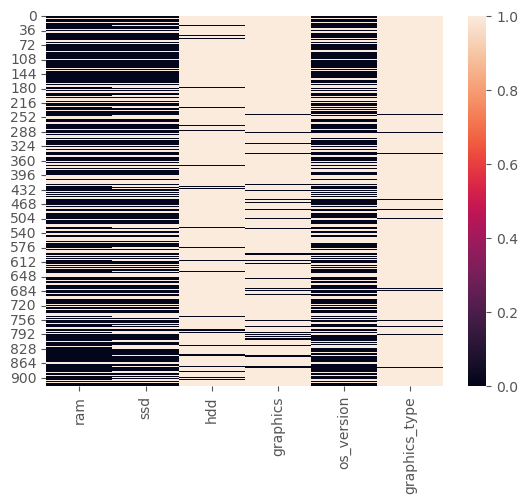

In [33]:
detail_df = df[['title','OS']].apply(lambda x: get_details(x[0],x[1]),axis=1)

sns.heatmap(detail_df.isnull())

<AxesSubplot:>

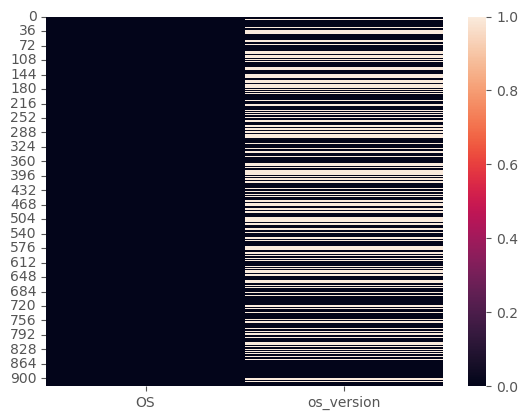

In [34]:
os_df= pd.DataFrame([df['OS'],detail_df['os_version']]).T
sns.heatmap(os_df.isnull())

In [35]:
def os_version_finder(x,y):
  x = str(x).lower()
  y = str(y).lower()
  if x == 'other':
    return 'other'
  return y.replace(x,'')

In [36]:
detail_df['os_version']=os_df.apply(lambda x: os_version_finder(x[0],x[1]),axis=1)

##  RAM

In [37]:
def plot_isnull(df):
   sns.heatmap(df.isnull(),cmap='PuBu')
   plt.show()

In [38]:
df['ram']=df['RAM'].str.extract(r"(\d+GB DDR|\d+ GB \w?DDR|\d+ GB LPDDR|\d+ GB Unified)").iloc[:,0].str.extract(r'(\d+)')

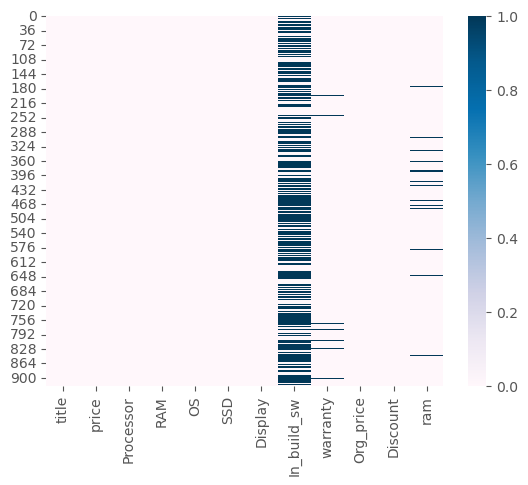

In [39]:
plot_isnull(df)

In [40]:
df['ram'].fillna(df['ram'].median(),inplace=True)

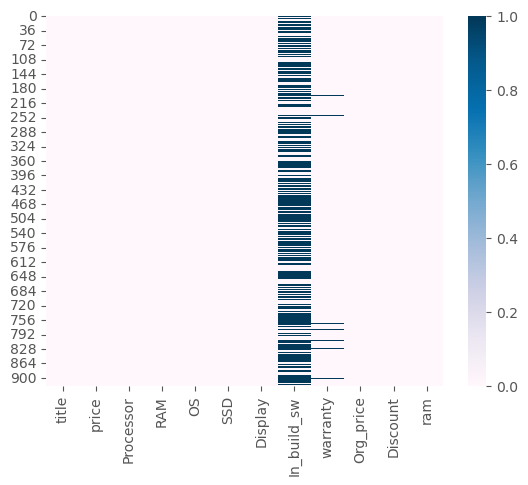

In [41]:
plot_isnull(df)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


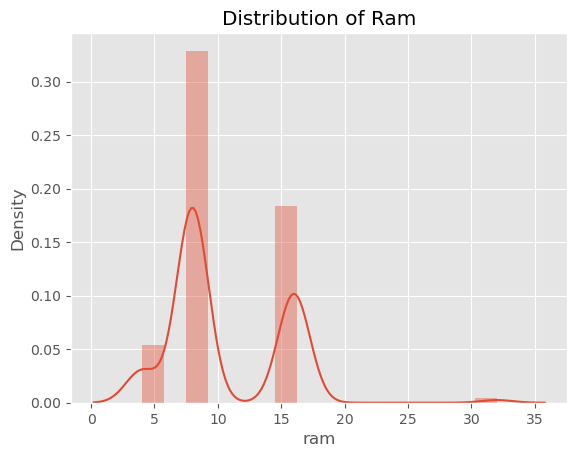

In [42]:
sns.distplot(detail_df['ram'])
plt.title("Distribution of Ram")
plt.show()

In [43]:
def TB_to_GB(x):
  mul =  False
  try:
    if 'tb' in x.lower(): mul = True
    x = re.search("(\d+)",x)[0]
    if mul: return int(x)*1000
    return x
  except: return 0



## Ram vs Price

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        920 non-null    object
 1   price        920 non-null    object
 2   Processor    920 non-null    object
 3   RAM          920 non-null    object
 4   OS           920 non-null    object
 5   SSD          920 non-null    object
 6   Display      920 non-null    object
 7   In_build_sw  357 non-null    object
 8   warranty     906 non-null    object
 9   Org_price    920 non-null    int64 
 10  Discount     920 non-null    int64 
 11  ram          920 non-null    object
dtypes: int64(2), object(10)
memory usage: 86.4+ KB


In [45]:
tmp=df[['OS','Org_price','ram']].fillna(df['ram'].median())
tmp['ram']=tmp['ram'].astype('float')

Text(0.5, 1.0, 'Price vs Ram')

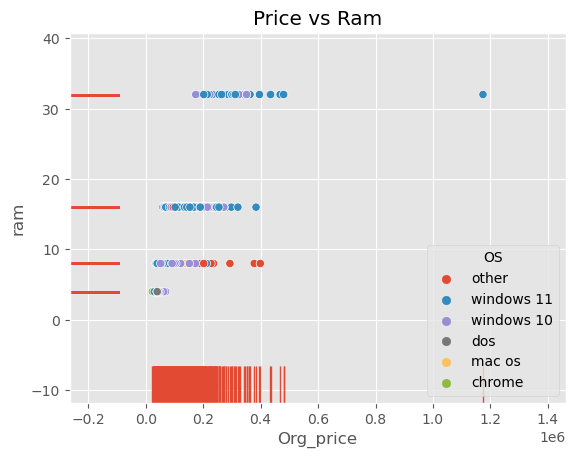

In [46]:
sns.scatterplot(data=tmp,x='Org_price',y='ram',hue='OS',)
sns.rugplot(data=tmp, x='Org_price',y='ram', height=.1)
plt.title('Price vs Ram')

Text(0.5, 1.0, 'Ram Vs Price')

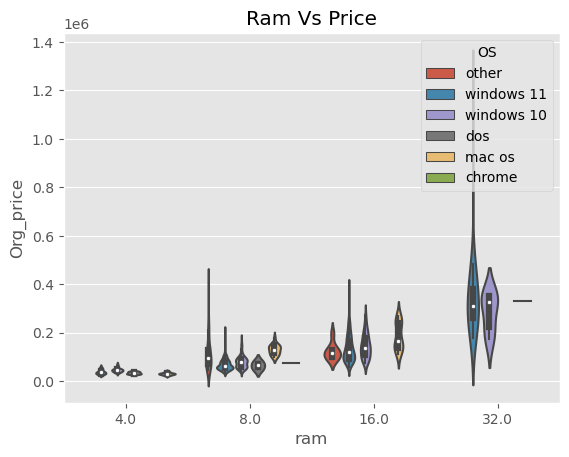

In [47]:
sns.violinplot(data=tmp,x='ram',y='Org_price',hue='OS')
#sns.jointplot(data=tmp,x='ram',y='Org_price',hue='OS')
plt.title('Ram Vs Price')

## HDD

In [48]:
df['hdd']=df.title.str.extract(r'(\d+ TB HDD|\d+ GB HDD)').iloc[:,0].apply(lambda x: TB_to_GB(x))

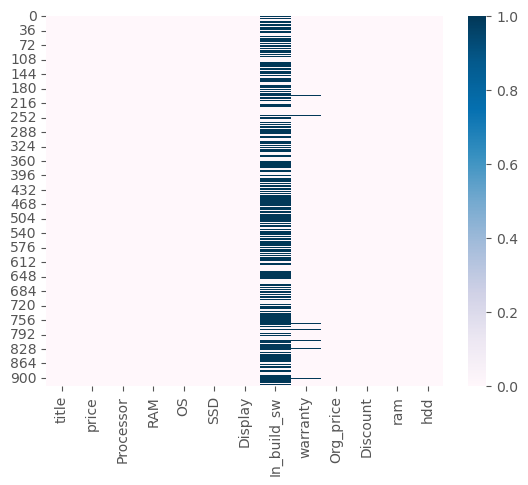

In [49]:
plot_isnull(df)

## SSD

In [50]:
df['ssd']=df.title.str.extract(r'(\d+ TB SSD|\d+ GB SSD)').iloc[:,0].apply(lambda x: TB_to_GB(x))

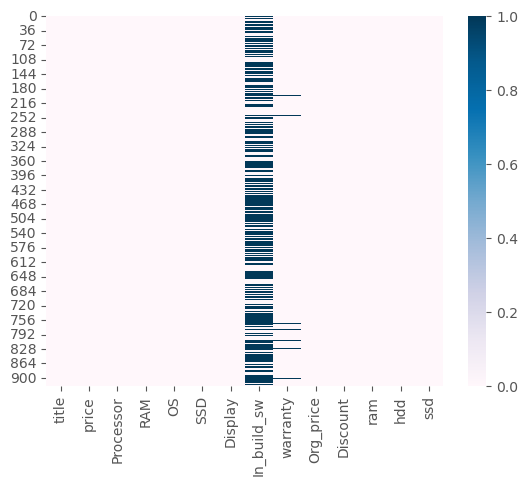

In [51]:
plot_isnull(df)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


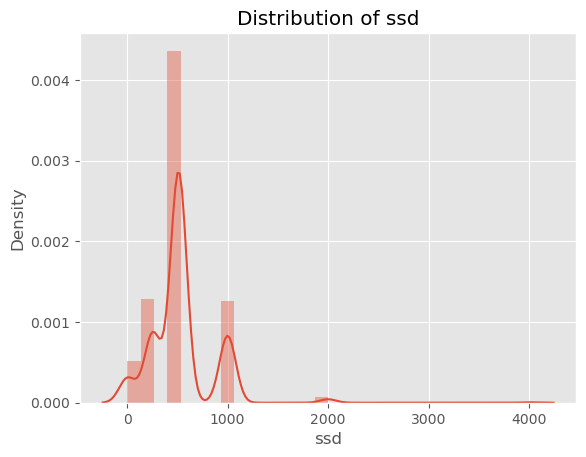

In [52]:
sns.distplot(df['ssd'])
plt.title("Distribution of ssd")
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


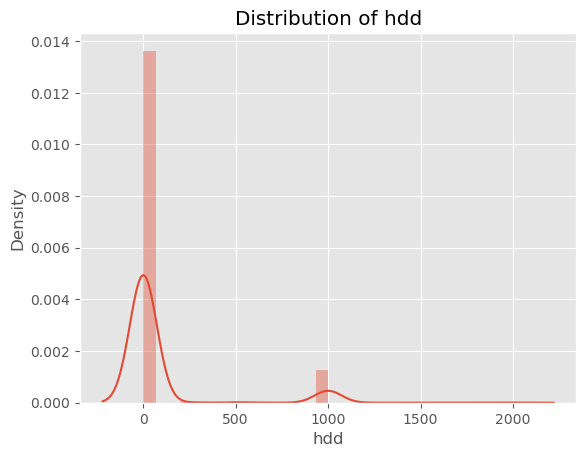

In [53]:
sns.distplot(df['hdd'])
plt.title("Distribution of hdd")
plt.show()

In [54]:
def type_of_storage(x1):
    if x1['ssd']>0 and x1['hdd']>0: return 'both'
    elif x1['ssd']>0 and x1['hdd']==0: return 'ssd'
    elif x1['hdd']>0 and x1['ssd']==0: return "hdd"
    #else: return "none"
    
df['storage_type']=df[['ssd','hdd']].astype(int).apply(lambda x: type_of_storage(x),axis=1)
#df = df[df['storage_type'].notna()]

Text(0.5, 1.0, 'Type of storage with total_storage impact on Price')

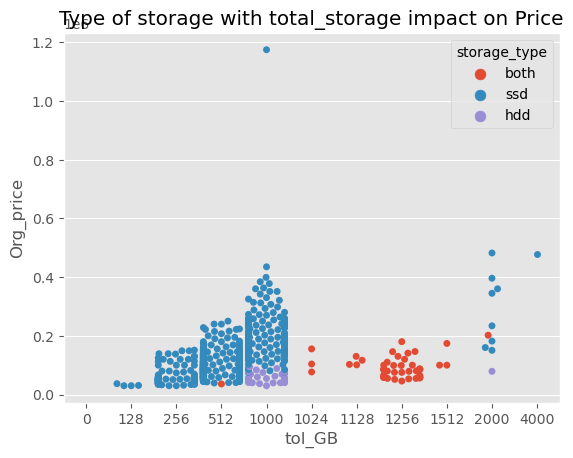

In [55]:
import warnings
warnings.filterwarnings('ignore')
tmp = df[['Org_price','ssd','hdd','storage_type']]
tmp['tol_GB']=tmp['ssd'].astype('int')+tmp['hdd'].astype('int')
sns.swarmplot(data=tmp[['Org_price','tol_GB','storage_type']],x='tol_GB',y='Org_price',hue='storage_type')
plt.title("Type of storage with total_storage impact on Price")

## Company

In [56]:
df['company']=df.title.apply(lambda  x: x.split('-')[0].split(' ')[0]).str.lower()#.value_counts()

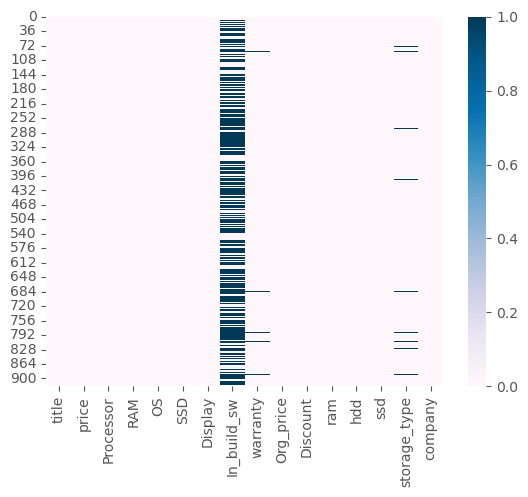

In [57]:
plot_isnull(df)

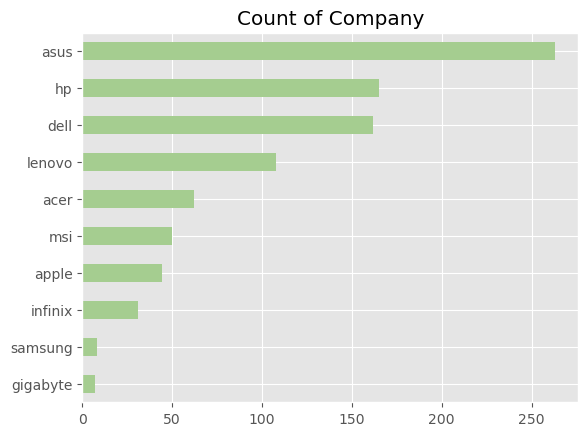

In [58]:

df['company'].value_counts()[:10][::-1].plot(kind='barh',cmap='crest')
plt.title("Count of Company")
plt.show()

In [59]:
df['ram'] = df['ram'].astype('float')
df['hdd'] = df['hdd'].astype('float')
df['ssd'] = df['ssd'].astype('float')

array([<AxesSubplot:title={'center':'Org_price'}, ylabel='company,storage_type'>],
      dtype=object)

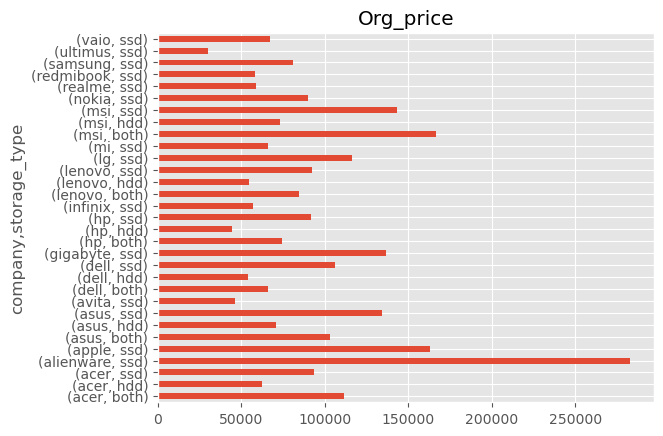

In [60]:
tmp = df[['company','hdd','ssd','ram','storage_type','Org_price']]
tmp.groupby(['company','storage_type'])['Org_price'].mean().plot(kind='barh',subplots=True)

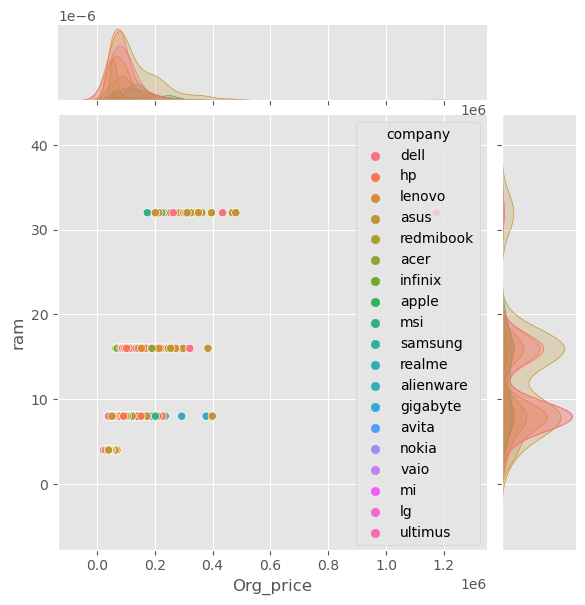

In [61]:
sns.jointplot(data=tmp,x='Org_price',y='ram',hue='company')

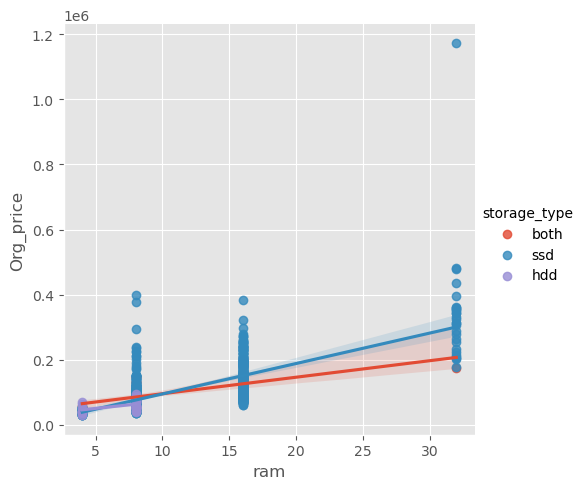

In [62]:
sns.lmplot(data=tmp, x="ram", y="Org_price", hue="storage_type")

## Processor 

In [63]:
import wordcloud

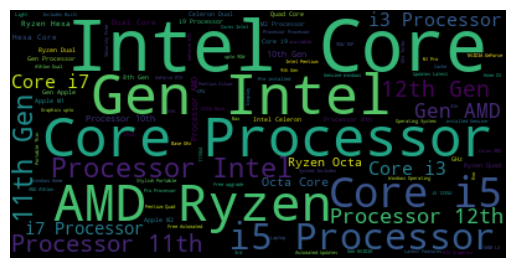

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df.Processor.values.tolist())
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [65]:
pattern_processor = r"\b(Intel Core i\d|Intel i\d|i\d|R\d|AMD Ryzen \d|AMD \d|ARM Cortex-A\d+|Intel Celeron |AMD Athlon|Apple M2|Apple M1|AMD Dual|NVIDIA \w+)\b"

In [66]:
df['ex_processor']=df["Processor"].str.replace("Processor: ",'').str.replace("Processor","").str.extract(pattern_processor)

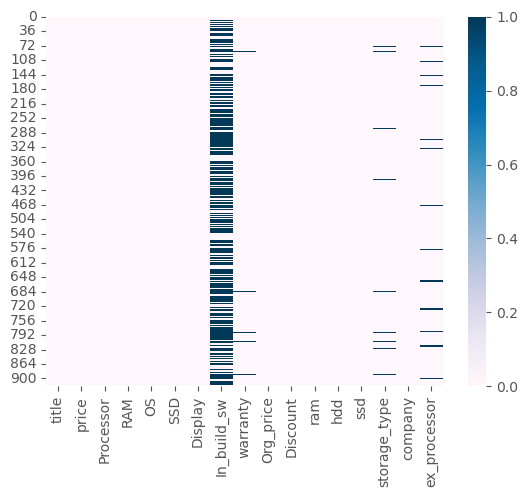

In [67]:
plot_isnull(df)

In [68]:
processor_mapper={"i5":'Intel Core i5',
                  "Intel i5":"Intel Core i5",
                  "Intel i3":"Intel Core i3",
                  "Intel i7":"Intel Core i7",
                  "i3":"Intel Core i3",
                  "i7":'Intel Core i7',
                  "Intel i9":'Intel Core i9',
                  "R7":"AMD Ryzen 7",
                  "R5":"AMD Ryzen 5",
                  "R3":"AMD Ryzen 3",
                  }
df['ex_processor'].value_counts()

Intel Core i5     237
Intel Core i3     128
Intel Core i7     127
AMD Ryzen 7        96
AMD Ryzen 5        91
AMD Ryzen 3        39
Intel Celeron      30
Apple M2           26
AMD Ryzen 9        26
Intel Core i9      21
Apple M1           17
NVIDIA GeForce      8
AMD Athlon          8
Intel i5            6
Intel i3            5
NVIDIA GEFORCE      4
NVIDIA RTX          3
Intel i7            3
R5                  2
AMD Dual            2
i5                  2
Intel i9            1
R3                  1
i3                  1
R7                  1
i7                  1
Name: ex_processor, dtype: int64

In [69]:
df['ex_processor']=df['ex_processor'].replace(processor_mapper)#.isnull().sum()

In [70]:
df['ex_processor'].value_counts()

Intel Core i5     245
Intel Core i3     134
Intel Core i7     131
AMD Ryzen 7        97
AMD Ryzen 5        93
AMD Ryzen 3        40
Intel Celeron      30
Apple M2           26
AMD Ryzen 9        26
Intel Core i9      22
Apple M1           17
AMD Athlon          8
NVIDIA GeForce      8
NVIDIA GEFORCE      4
NVIDIA RTX          3
AMD Dual            2
Name: ex_processor, dtype: int64

In [71]:
df['ex_processor'].fillna(df['ex_processor'].mode().values[0],inplace= True)

In [72]:
df['ex_processor'].value_counts()

Intel Core i5     279
Intel Core i3     134
Intel Core i7     131
AMD Ryzen 7        97
AMD Ryzen 5        93
AMD Ryzen 3        40
Intel Celeron      30
Apple M2           26
AMD Ryzen 9        26
Intel Core i9      22
Apple M1           17
AMD Athlon          8
NVIDIA GeForce      8
NVIDIA GEFORCE      4
NVIDIA RTX          3
AMD Dual            2
Name: ex_processor, dtype: int64

<AxesSubplot:ylabel='ex_processor,storage_type'>

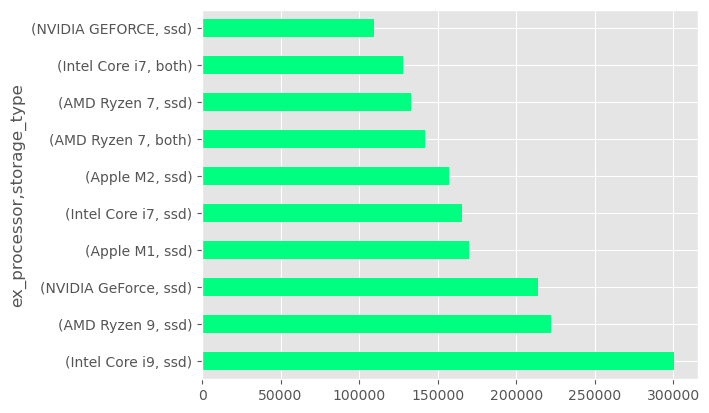

In [73]:
tmp = df[['Org_price','ex_processor','ssd','hdd','storage_type']]
tmp.groupby(['ex_processor','storage_type'])['Org_price'].mean().nlargest(10).plot(kind='barh',cmap='winter_r')

# Type of end

In [74]:
def factor_all(x):
  if x in ['11th','12th','10th','Ryzen 7','Ryzen 9']: return "high"
  elif x in ['8th','9th','10th','Ryzen 5']: return 'mid'
  elif x in ['4th','5th','6th','Ryzen 3']: return 'low'
  else: return np.nan

In [75]:
df['type_factor']=df['title'].str.extract(r"\b(\d*th|Ryzen \d|NVIDIA \w*)\b").iloc[:,0].apply(lambda x: factor_all(x))

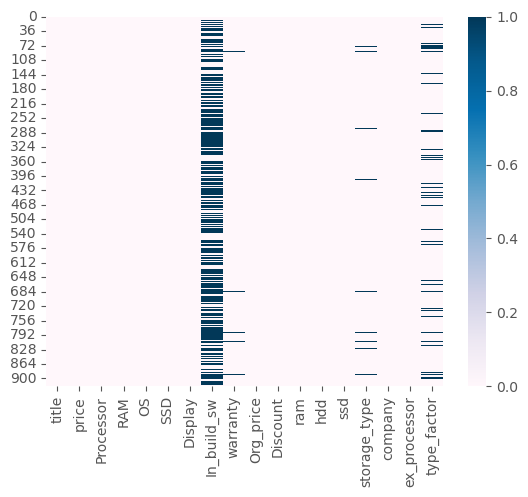

In [76]:
plot_isnull(df)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

tmp_df  = df[['Org_price','ram','hdd','ssd','storage_type','company','ex_processor','type_factor']]

kknc =  KNeighborsClassifier(n_neighbors=3)

tmp_df_train = tmp_df[tmp_df['type_factor'].notna()]
tmp_df_test = tmp_df[tmp_df['type_factor'].isnull()]

lab = LabelEncoder().fit(tmp_df_train.iloc[:,-1])
y_train = lab.transform(tmp_df_train.iloc[:,-1])

step1 =  ColumnTransformer([
    ("one",OneHotEncoder(drop='first',sparse=False),[4,5,6])
],remainder='passthrough')

knnc =  Pipeline([('step_1',step1),('knn',kknc)])
print("Score of KNN for type_of_factor: ",knnc.fit(tmp_df_train.iloc[:,:-1],y_train).score(tmp_df_train.iloc[:,:-1],y_train))


def pred_type(x):
    global knnc,lab
    try:
        pred = knnc.predict(x)
        return lab.inverse_transform(knnc.predict(x))[0]
    except: return np.nan

Score of KNN for type_of_factor:  0.8614823815309842


In [78]:
tmp_df['pred']=tmp_df.iloc[:,:-1].apply(lambda x: pred_type(x.values.reshape(1,-1)),axis=1)

In [79]:
tmp_df['type_factor']=tmp_df['type_factor'].fillna(tmp_df['pred'])

In [80]:
df=pd.concat([df,detail_df[['graphics','graphics_type','os_version']]],axis=1)

In [81]:
df['type_factor'].fillna(tmp_df['type_factor'],inplace=True)

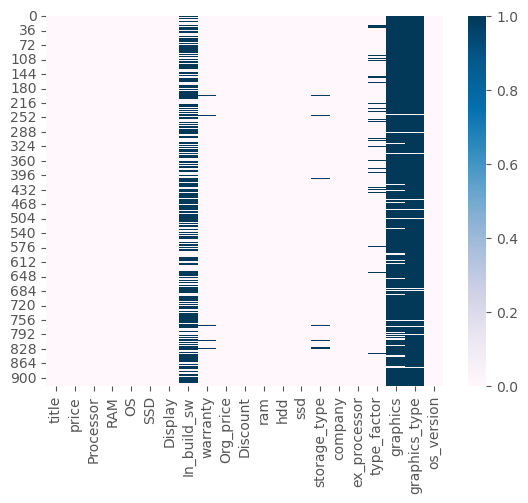

In [82]:
plot_isnull(df)

In [83]:
df['graphics'].fillna(0,inplace=True)
df['graphics_type'].fillna('None',inplace=True)

In [84]:
df =df[df['type_factor'].notna()]
df = df[df['storage_type'].notna()]

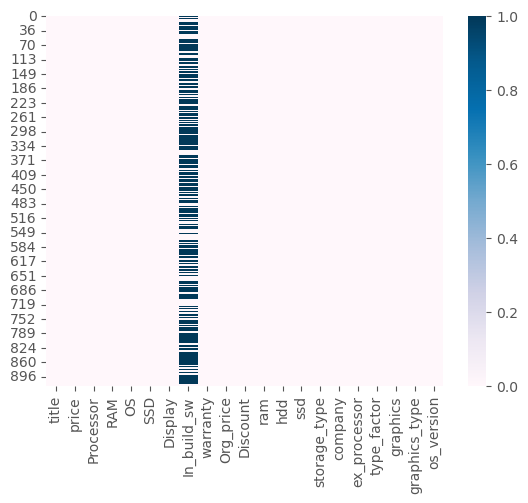

In [85]:
plot_isnull(df)

In [86]:
import plotly.express as px
tmp_df = df[['Org_price', 'ram', 'hdd', 'ssd', 'storage_type', 'company',
       'ex_processor']]
#px.scatter_3d()
from sklearn.decomposition import PCA
pca_df = pd.DataFrame(PCA(n_components=3).fit_transform(tmp_df[['Org_price', 'ram', 'hdd', 'ssd']]))
pca_df['company'] = tmp_df['company']
pca_df['processor'] = tmp_df['ex_processor']
pca_df['storage_type'] = tmp_df['storage_type']

In [87]:
px.scatter_3d(data_frame=pca_df,x=1,y=0,z=2,color='processor',title='Impact of price and storage, ram on Processor')

In [88]:
px.scatter_3d(data_frame=pca_df,x=1,y=0,z=2,color='company',title='Impact of price and storage, ram on Company')

## Type of Ram

In [89]:
text = ' '.join(df['RAM'].str.replace("RAM & Storage:",'').str.replace("RAM",'').str.replace("GB",'').values.tolist())

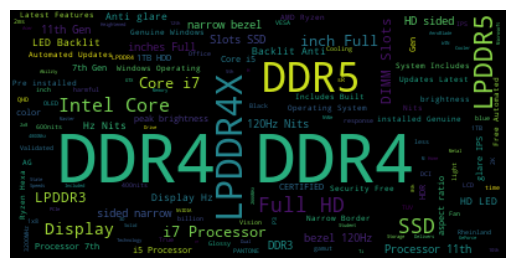

In [90]:
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [91]:
def ram_type(x):
  if "lpddr5" in str(x).lower(): return "lpddr5"
  elif "lpddr4" in str(x).lower(): return "lpddr4"
  elif "ddr4" in str(x).lower(): return "ddr4"
  elif "ddr5" in str(x).lower(): return "ddr5"
  elif "ddr3" in str(x).lower(): return "ddr3"
  else: return "other"


In [92]:
df['ram_type']=df['RAM'].str.replace("RAM & Storage:",'').str.replace("RAM",'').str.replace("GB",'').apply(lambda x: ram_type(x))

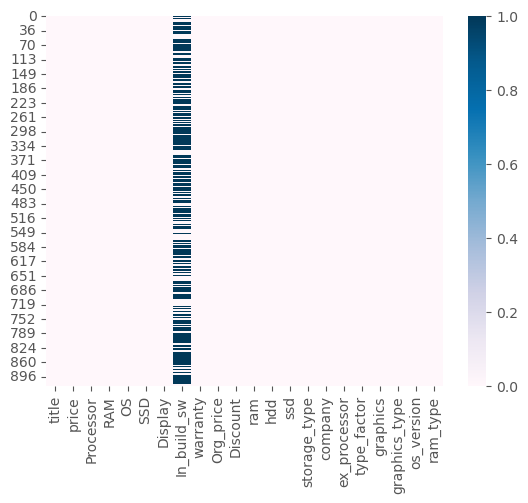

In [93]:
plot_isnull(df)

<AxesSubplot:ylabel='ex_processor,ram_type'>

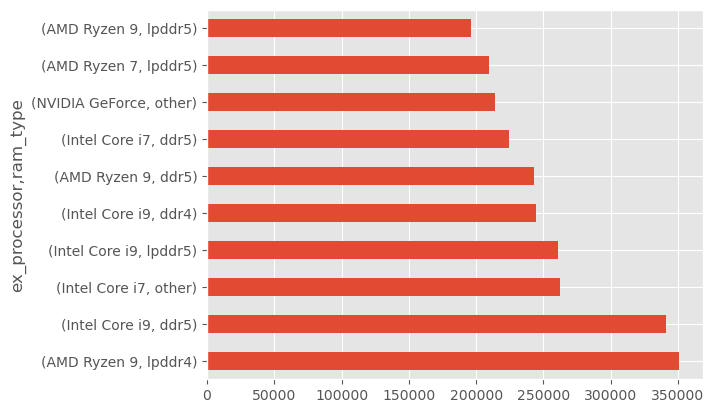

In [94]:
df.groupby(['ex_processor','ram_type'])['Org_price'].mean().nlargest(10).plot(kind='barh')

<AxesSubplot:ylabel='OS,ram_type,os_version'>

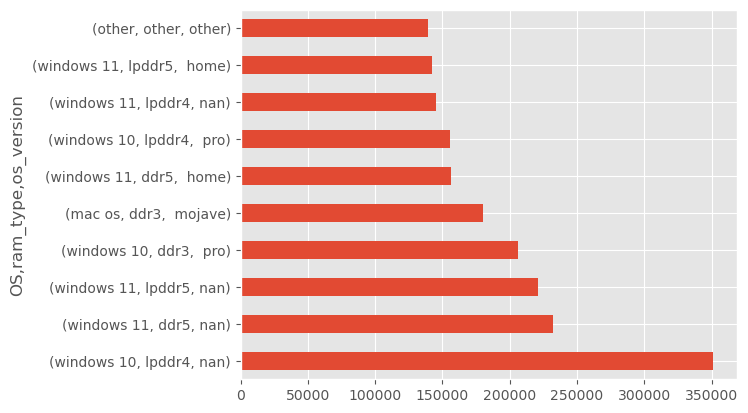

In [95]:
df.groupby(['OS','ram_type','os_version'])['Org_price'].mean().nlargest(10).plot(kind='barh')

## Display

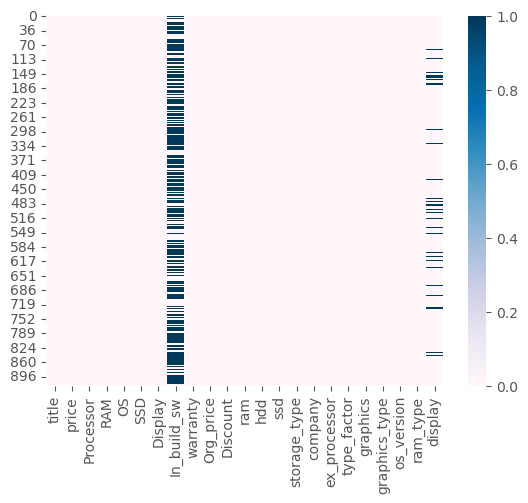

In [96]:
pattern_disp = r"\((\d+\.\d+|\d+) inch\)"
df['display']=df['Display'].str.lower().str.extract(pattern_disp)
plot_isnull(df)

In [97]:
df['display'].fillna(df['display'].astype('float').median(),inplace=True)


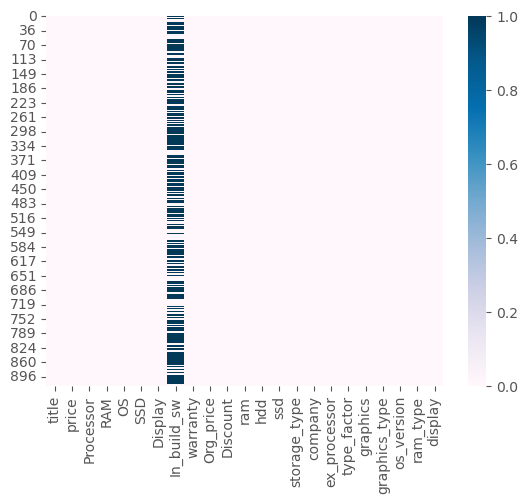

In [98]:
plot_isnull(df)

In [99]:
df['display'] = df['display'].astype('float')

Text(0.5, 1.0, 'Display KDE')

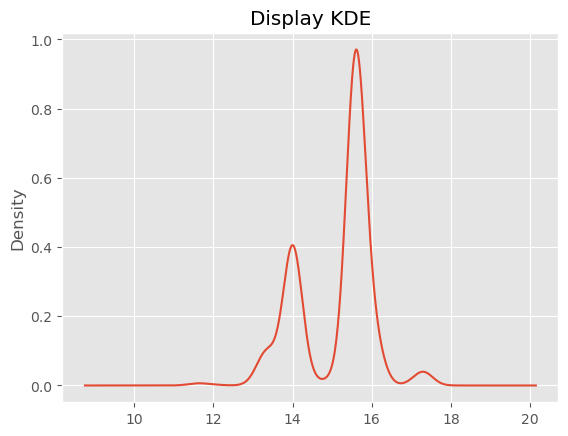

In [100]:
df['display'].plot(kind='kde')
plt.title('Display KDE')

In [101]:
tmp_df = df[['Org_price','display','type_factor']]

<AxesSubplot:xlabel='Org_price', ylabel='type_factor'>

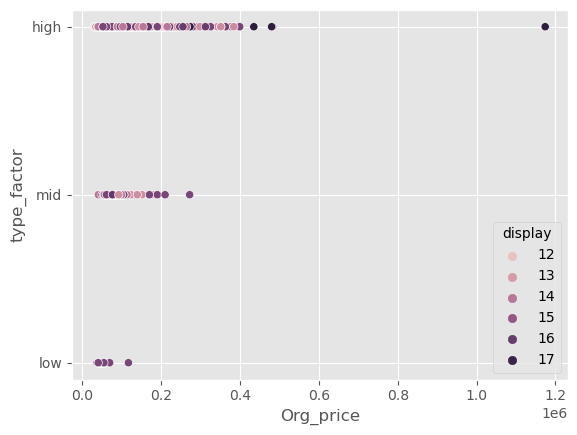

In [102]:
sns.scatterplot(data=tmp_df,x='Org_price',y='type_factor',hue='display')

## Final DF

In [103]:
df = df[['company',
       'ex_processor', 'type_factor', 'ram', 'ssd', 'hdd', 'graphics',
       'os_version', 'graphics_type', 'ram_type', 'display','storage_type','Org_price' ]]

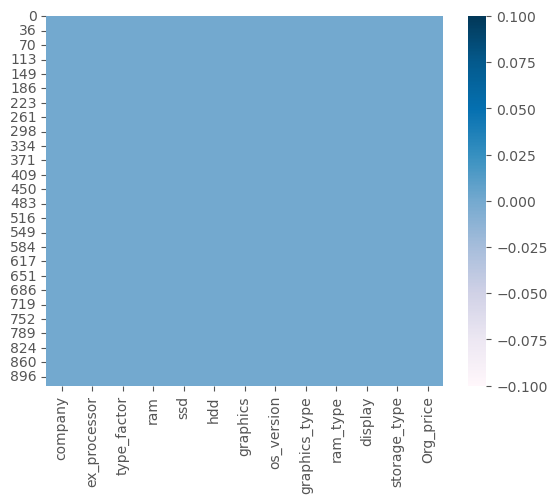

In [104]:
plot_isnull(df)

In [105]:
df.head()

company   ex_processor type_factor  ram    ssd     hdd  graphics os_version  \
0    dell  Intel Core i3        high  8.0  256.0  1000.0       0.0      other   
1      hp  Intel Core i3        high  8.0  256.0     0.0       0.0       home   
2  lenovo  Intel Core i3        high  8.0  512.0     0.0       0.0       home   
3      hp  Intel Core i3        high  8.0  512.0     0.0       0.0       home   
4    asus  Intel Core i3        high  8.0  512.0     0.0       0.0       home   

  graphics_type ram_type  display storage_type  Org_price  
0          None     ddr4     15.6         both      58489  
1          None     ddr4     14.0          ssd      47206  
2          None     ddr4     15.6          ssd      59760  
3          None     ddr4     15.6          ssd      56260  
4          None     ddr4     15.6          ssd      45990

In [106]:
df.describe()

ram          ssd          hdd    graphics     display  \
count  846.000000   846.000000   846.000000  846.000000  846.000000   
mean    11.640662   550.808511    95.801418    0.602837   15.119716   
std      5.537047   312.888461   296.234735    4.629792    0.933911   
min      4.000000     0.000000     0.000000    0.000000   11.600000   
25%      8.000000   512.000000     0.000000    0.000000   14.000000   
50%      8.000000   512.000000     0.000000    0.000000   15.600000   
75%     16.000000   512.000000     0.000000    0.000000   15.600000   
max     32.000000  4000.000000  2000.000000  128.000000   17.300000   

          Org_price  
count  8.460000e+02  
mean   1.074650e+05  
std    7.496579e+04  
min    2.999000e+04  
25%    6.120200e+04  
50%    8.652350e+04  
75%    1.242098e+05  
max    1.174131e+06

In [124]:
X =  df.iloc[:,:-1]

In [125]:
Y = df.iloc[:,-1]

In [127]:
print(f"X: {X.shape}, Y: {Y.shape}")

X: (846, 12), Y: (846,)


Text(0.5, 1.0, 'Distribution of Price')

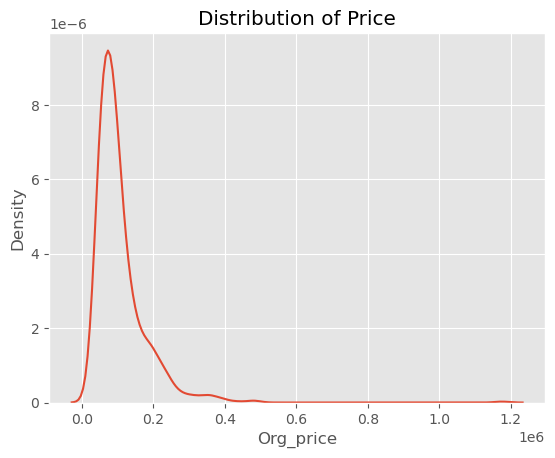

In [128]:
sns.kdeplot(Y)
plt.title('Distribution of Price')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 919
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        846 non-null    object 
 1   ex_processor   846 non-null    object 
 2   type_factor    846 non-null    object 
 3   ram            846 non-null    float64
 4   ssd            846 non-null    float64
 5   hdd            846 non-null    float64
 6   graphics       846 non-null    float64
 7   os_version     846 non-null    object 
 8   graphics_type  846 non-null    object 
 9   ram_type       846 non-null    object 
 10  display        846 non-null    float64
 11  storage_type   846 non-null    object 
 12  Org_price      846 non-null    int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 124.8+ KB


<AxesSubplot:>

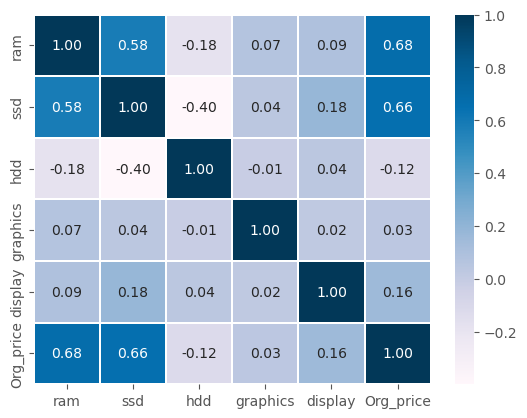

In [130]:
sns.heatmap(df.corr(),cmap='PuBu',annot=True, fmt='.2f', linewidths=0.25)

In [131]:
df.head()

company   ex_processor type_factor  ram    ssd     hdd  graphics os_version  \
0    dell  Intel Core i3        high  8.0  256.0  1000.0       0.0      other   
1      hp  Intel Core i3        high  8.0  256.0     0.0       0.0       home   
2  lenovo  Intel Core i3        high  8.0  512.0     0.0       0.0       home   
3      hp  Intel Core i3        high  8.0  512.0     0.0       0.0       home   
4    asus  Intel Core i3        high  8.0  512.0     0.0       0.0       home   

  graphics_type ram_type  display storage_type  Org_price  
0          None     ddr4     15.6         both      58489  
1          None     ddr4     14.0          ssd      47206  
2          None     ddr4     15.6          ssd      59760  
3          None     ddr4     15.6          ssd      56260  
4          None     ddr4     15.6          ssd      45990

In [132]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [162]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=70,shuffle=False)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((761, 12), (85, 12), (761,), (85,))

In [163]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
def check_score(est,x_test,y_test):
  y_pred = est.predict(x_test)
  print('R2 score',r2_score(y_test,y_pred))
  print('MAE',mean_absolute_error(y_test,y_pred))


from sklearn import set_config
set_config(display="diagram")

## LINEAR_REGRESSION

In [164]:

step1= ColumnTransformer(
    transformers=[
        ("one_hot",OneHotEncoder(drop='first',sparse=False),['type_factor','ex_processor','os_version', 'ram_type', 'storage_type']),
        ("standard_scaler",StandardScaler(),['ram','ssd','hdd','graphics'])
    ]
    
)

step2 =  LinearRegression()


pipe = Pipeline([('step_1',step1),('step_2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
pipe

R2 score 0.7973396922157014
MAE 17788.494938850727


Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('step_2', LinearRegression())])

## Ridge

In [167]:
import warnings
warnings.filterwarnings('ignore')
ridge_params  = {"step_2__alpha":np.arange(0,1,0.2).tolist(),"step_2__solver":['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

pipe = Pipeline([('step_1',step1),('step_2',Ridge())])
ran_ridge = RandomizedSearchCV(pipe,ridge_params,cv=5 ,random_state=1)
ridge = ran_ridge.fit(X_train,y_train)
check_score(ridge,X_test,y_test)
print(ridge.best_estimator_)
ridge

R2 score 0.7973396922157017
MAE 17788.49493885072
Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('step_2', Ridge(alpha=0.0, solver='cholesky'))])


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step_1',
                                              ColumnTransformer(transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['type_factor',
                                                                                'ex_processor',
                                                                                'os_version',
                                                                                'ram_type',
                                                                                'storage_type']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['ram',
                                                                                'ssd',
                                                                                'hdd',
                                                                                'graphics'])])),
                                             ('step_2', Ridge())]),
                   param_distributions={'step_2__alpha': [0.0, 0.2, 0.4,
                                                          0.6000000000000001,
                                                          0.8],
                                        'step_2__solver': ['auto', 'svd',
                                                           'cholesky', 'lsqr',
                                                           'sparse_cg', 'sag',
                                                           'saga', 'lbfgs']},
                   random_state=1)

## Lasso

In [168]:
lasso_param = {"step_2__alpha":np.arange(0,1,0.2)}

pipe = Pipeline([('step_1',step1),('step_2',Lasso())])
lasso_reg = RandomizedSearchCV(pipe,lasso_param,cv=5, random_state=1)
lasso_mo = lasso_reg.fit(X_train,y_train)
check_score(lasso_mo,X_test,y_test)
print(lasso_mo.best_estimator_)
lasso_mo

R2 score 0.7973396922156638
MAE 17788.49493893858
Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('step_2', Lasso(alpha=0.0))])


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step_1',
                                              ColumnTransformer(transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['type_factor',
                                                                                'ex_processor',
                                                                                'os_version',
                                                                                'ram_type',
                                                                                'storage_type']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['ram',
                                                                                'ssd',
                                                                                'hdd',
                                                                                'graphics'])])),
                                             ('step_2', Lasso())]),
                   param_distributions={'step_2__alpha': array([0. , 0.2, 0.4, 0.6, 0.8])},
                   random_state=1)

## Decision_Regressor

In [169]:
dt_param = {"step_2__max_depth":np.arange(2,10),"step_2__max_features":['auto','sqrt','log2']}
piped = Pipeline([('step_1',step1),('step_2',DecisionTreeRegressor())])
pipe = RandomizedSearchCV(piped,dt_param,cv=5, random_state=1)
pipe.fit(X_train,y_train)
check_score(pipe,X_test,y_test)
print(pipe.best_estimator_)
pipe

R2 score 0.6352843753574353
MAE 23509.87903710503
Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('step_2',
                 DecisionTreeRegressor(max_depth=6, max_features='sqrt'))])


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step_1',
                                              ColumnTransformer(transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['type_factor',
                                                                                'ex_processor',
                                                                                'os_version',
                                                                                'ram_type',
                                                                                'storage_type']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['ram',
                                                                                'ssd',
                                                                                'hdd',
                                                                                'graphics'])])),
                                             ('step_2',
                                              DecisionTreeRegressor())]),
                   param_distributions={'step_2__max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'step_2__max_features': ['auto', 'sqrt',
                                                                 'log2']},
                   random_state=1)

## SGD Regression

In [170]:
from sklearn.linear_model import SGDRegressor
sgd_params = {"m__penalty":['l2','l1','elasticnet'],"m__alpha":[0.01,1e-3,1e-6],"m__tol":[0.01,1e-3,1e-6]}

piped = Pipeline([('step_1',step1),('m',SGDRegressor())])
pipe = RandomizedSearchCV(piped,sgd_params,cv=5,  random_state=1)
pipe.fit(X_train,y_train)
check_score(pipe,X_test,y_test)
print(pipe.best_estimator_)
pipe

R2 score 0.7660763877203263
MAE 18951.17174099635
Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('m',
                 SGDRegressor(alpha=0.001, penalty='elasticnet', tol=1e-06))])


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step_1',
                                              ColumnTransformer(transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['type_factor',
                                                                                'ex_processor',
                                                                                'os_version',
                                                                                'ram_type',
                                                                                'storage_type']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['ram',
                                                                                'ssd',
                                                                                'hdd',
                                                                                'graphics'])])),
                                             ('m', SGDRegressor())]),
                   param_distributions={'m__alpha': [0.01, 0.001, 1e-06],
                                        'm__penalty': ['l2', 'l1',
                                                       'elasticnet'],
                                        'm__tol': [0.01, 0.001, 1e-06]},
                   random_state=1)

## KNN Regressor

In [171]:
knn_params = {"m__n_neighbors":np.arange(1,21,1),"m__algorithm":["ball_tree","kd_tree","brute"],"m__p":[1,2]}

piped = Pipeline([('step_1',step1),('m',KNeighborsRegressor())])
pipe = RandomizedSearchCV(piped,knn_params,cv=5,  random_state=1)
pipe.fit(X_train,y_train)
check_score(pipe,X_test,y_test)
print(pipe.best_estimator_)
pipe

R2 score 0.7387563574446094
MAE 18215.748529411765
Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('m', KNeighborsRegressor(algorithm='brute', n_neighbors=8))])


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step_1',
                                              ColumnTransformer(transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['type_factor',
                                                                                'ex_processor',
                                                                                'os_version',
                                                                                'ram_type',
                                                                                'storage_type']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['ram',
                                                                                'ssd',
                                                                                'hdd',
                                                                                'graphics'])])),
                                             ('m', KNeighborsRegressor())]),
                   param_distributions={'m__algorithm': ['ball_tree', 'kd_tree',
                                                         'brute'],
                                        'm__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'm__p': [1, 2]},
                   random_state=1)

## RandomForestRegressor

In [172]:

rft_params = {"m__n_estimators":np.arange(100,500,100),"m__max_depth":np.arange(2,5,1)}

piped = Pipeline([('step_1',step1),('m',RandomForestRegressor())])
pipe = GridSearchCV(piped,rft_params,cv=5,)
pipe.fit(X_train,y_train)
check_score(pipe,X_test,y_test)
print(pipe.best_estimator_)
pipe

R2 score 0.6108353704376399
MAE 25947.150792272856
Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('m', RandomForestRegressor(max_depth=2))])


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('step_1',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['type_factor',
                                                                          'ex_processor',
                                                                          'os_version',
                                                                          'ram_type',
                                                                          'storage_type']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['ram',
                                                                          'ssd',
                                                                          'hdd',
                                                                          'graphics'])])),
                                       ('m', RandomForestRegressor())]),
             param_grid={'m__max_depth': array([2, 3, 4]),
                         'm__n_estimators': array([100, 200, 300, 400])})

## ADABoost Regressor

In [173]:
ada_params = {"m__n_estimators":np.arange(1,100,5),"m__learning_rate":[1e-2,1e-3,1e-4,1e-5,1e-6]}

piped = Pipeline([('step_1',step1),('m',AdaBoostRegressor())])
pipe = RandomizedSearchCV(piped,ada_params,cv=5,  random_state=1)
pipe.fit(X_train,y_train)
check_score(pipe,X_test,y_test)
print(pipe.best_estimator_)
pipe

R2 score 0.6220236481911496
MAE 22557.30834634902
Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('m', AdaBoostRegressor(learning_rate=1e-06, n_estimators=1))])


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step_1',
                                              ColumnTransformer(transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['type_factor',
                                                                                'ex_processor',
                                                                                'os_version',
                                                                                'ram_type',
                                                                                'storage_type']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['ram',
                                                                                'ssd',
                                                                                'hdd',
                                                                                'graphics'])])),
                                             ('m', AdaBoostRegressor())]),
                   param_distributions={'m__learning_rate': [0.01, 0.001,
                                                             0.0001, 1e-05,
                                                             1e-06],
                                        'm__n_estimators': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
                   random_state=1)

GradientBoostingRegressor

In [181]:
gar_params = {"m__n_estimators":np.arange(1,100,5),"m__learning_rate":[1e-2,1e-3,1e-4,1e-5,1e-6],'m__alpha':np.arange(0,1,0.05)}

piped = Pipeline([('step_1',step1),('m',GradientBoostingRegressor())])
pipe = RandomizedSearchCV(piped,gar_params,cv=5,  random_state=1)
pipe.fit(X_train,y_train)
check_score(pipe,X_test,y_test)
print(pipe.best_estimator_)
pipe

R2 score -0.03293895010035519
MAE 45307.55180472794
Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('m',
                 GradientBoostingRegressor(alpha=0.5, learning_rate=1e-05,
                                           n_estim

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step_1',
                                              ColumnTransformer(transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['type_factor',
                                                                                'ex_processor',
                                                                                'os_version',
                                                                                'ram_type',
                                                                                'storage_type']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['ram',
                                                                                'ssd',
                                                                                'hdd',
                                                                                'graphics'])])),
                                             ('m',
                                              GradientBoostingRegressor())]),
                   param_distributions={'m__alpha': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'm__learning_rate': [0.01, 0.001,
                                                             0.0001, 1e-05,
                                                             1e-06],
                                        'm__n_estimators': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
                   random_state=1)

SVR

In [174]:
svr_params = {
    "m__kernel":['linear','poly','rbf','sigmoid'],
    'm__degree': np.arange(2,8,1),
    'm__tol':[1e-1,1e-2]
}
piped = Pipeline([('step_1',step1),('m',SVR())])
pipe = RandomizedSearchCV(piped,svr_params,cv=5,random_state=1)
pipe.fit(X_train,y_train)
check_score(pipe,X_test,y_test)
print(pipe.best_estimator_)
pipe

R2 score -0.03108939079177664
MAE 39217.034765231365
Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('m', SVR(degree=6, kernel='linear', tol=0.01))])


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step_1',
                                              ColumnTransformer(transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['type_factor',
                                                                                'ex_processor',
                                                                                'os_version',
                                                                                'ram_type',
                                                                                'storage_type']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['ram',
                                                                                'ssd',
                                                                                'hdd',
                                                                                'graphics'])])),
                                             ('m', SVR())]),
                   param_distributions={'m__degree': array([2, 3, 4, 5, 6, 7]),
                                        'm__kernel': ['linear', 'poly', 'rbf',
                                                      'sigmoid'],
                                        'm__tol': [0.1, 0.01]},
                   random_state=1)

## XGBooster

In [175]:
xg_params = {
 'm__max_depth':range(3,6),
 'm__min_child_weight':range(1,6,2),
 "m__learning_rate":[1e-1,1e-2],
 'm__n_estimators':np.arange(10,100,10),
}

piped = Pipeline([('step_1',step1),('m',XGBRegressor())])
pipe = RandomizedSearchCV(piped,xg_params,cv=5,random_state=1)
pipe.fit(X_train,y_train)
check_score(pipe,X_test,y_test)
print(pipe.best_estimator_)
pipe

R2 score 0.8383515203876207
MAE 14375.379181985294
Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('m',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_byleve

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step_1',
                                              ColumnTransformer(transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['type_factor',
                                                                                'ex_processor',
                                                                                'os_version',
                                                                                'ram_type',
                                                                                'storage_type']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['ram',
                                                                                'ssd',
                                                                                'hdd',
                                                                                'graphics'])])),
                                             ('m',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           co...
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=None,
                                                           reg_alpha=None,
                                                           reg_lambda=None, ...))]),
                   param_distributions={'m__learning_rate': [0.1, 0.01],
                                        'm__max_depth': range(3, 6),
                                        'm__min_child_weight': range(1, 6, 2),
                                        'm__n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=1)

MLPRegressor

In [176]:
from sklearn.neural_network import MLPRegressor

mlp_params = {
    "m__hidden_layer_sizes":[(100,),(1028,512,256,128,)],
    #"m__activation":['relu'],
    #'m__solver':['sgd','adam'],
    #"m__alpha":[1e-1,1e-2,1e-3],
    #"m__learning_rate":['invscaling','adaptive'],
    #"m__learning_rate_init":[1e-1,1e-2,1e-4,1e-6],
    #"m__tol":[1e-5,1e-6,1e-7],
    #"m__max_iter":np.arange(100,1000,100),
    #"m__momentum":np.arange(0,1,0.1),

    }

piped = Pipeline([('step_1',step1),('m',MLPRegressor())])
pipe = RandomizedSearchCV(piped,mlp_params,cv=5,  random_state=1)
pipe.fit(X_train,y_train)
check_score(pipe,X_test,y_test)
print(pipe.best_estimator_)
pipe  

R2 score -3.3248689871435397
MAE 98204.98128602417
Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('m', MLPRegressor())])


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('step_1',
                                              ColumnTransformer(transformers=[('one_hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse=False),
                                                                               ['type_factor',
                                                                                'ex_processor',
                                                                                'os_version',
                                                                                'ram_type',
                                                                                'storage_type']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['ram',
                                                                                'ssd',
                                                                                'hdd',
                                                                                'graphics'])])),
                                             ('m', MLPRegressor())]),
                   param_distributions={'m__hidden_layer_sizes': [(100,),
                                                                  (1028, 512,
                                                                   256, 128)]},
                   random_state=1)

## StackedRegressor

In [186]:
from sklearn.ensemble import StackingRegressor
est = [
  
     ('m3',SGDRegressor(penalty='elasticnet', tol=1e-06)),
     ('m4',ExtraTreesRegressor()),
     ('m2', KNeighborsRegressor(algorithm='ball_tree')),  
    ('m',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=4, max_leaves=0, min_child_weight=3,
                              n_estimators=90, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ))
    
     
       
]

stkpipe = StackingRegressor(estimators=est,final_estimator=Ridge())
pipe = Pipeline([('step1',step1),("step2",stkpipe)])
pipe.fit(X_train,y_train)
check_score(pipe,X_test,y_test)
pipe

R2 score 0.7727404700254328
MAE 17626.70613992951


Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('step2',
                 StackingRegressor(estimators=[('m3',
                                                SGDRegressor(penalty='elasticnet',
                                                             tol=1e-06)),
                                               ('m4', Ex...
                                                             grow_policy='depthwise',
                                                             importance_type=None,
                                                             interaction_constraints='',
                                                             learning_rate=0.1,
                                                             max_bin=256,
                                                             max_cat_to_onehot=4,
                                                             max_delta_step=0,
                                                             max_depth=4,
                                                             max_leaves=0,
                                                             min_child_weight=3,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=90,
                                                             n_jobs=0,
                                                             num_parallel_tree=1,
                                                             predictor='auto',
                                                             random_state=0,
                                                             reg_alpha=0,
                                                             reg_lambda=1, ...))],
                                   final_estimator=Ridge()))])

VoterRegression

In [187]:
from sklearn.ensemble import VotingRegressor

est = [
  
     ('m3',SGDRegressor(penalty='elasticnet', tol=1e-06)),
     ('m2', KNeighborsRegressor(algorithm='ball_tree')),  
     ('m1',Ridge(alpha=0.6)),
    ('m',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=4, max_leaves=0, min_child_weight=3,
                              n_estimators=90, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ))
       
]

vpipe = VotingRegressor(estimators=est,verbose=1)

pipe = Pipeline([('step1',step1),("step2",vpipe)])
pipe.fit(X_train,y_train)
check_score(pipe,X_test,y_test)
pipe

[Voting] ....................... (1 of 4) Processing m3, total=   0.0s
[Voting] ....................... (2 of 4) Processing m2, total=   0.0s
[Voting] ....................... (3 of 4) Processing m1, total=   0.0s
[Voting] ........................ (4 of 4) Processing m, total=   0.2s
R2 score 0.8178472186009768
MAE 15709.204091048572


Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['type_factor',
                                                   'ex_processor', 'os_version',
                                                   'ram_type',
                                                   'storage_type']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['ram', 'ssd', 'hdd',
                                                   'graphics'])])),
                ('step2',
                 VotingRegressor(estimators=[('m3',
                                              SGDRegressor(penalty='elasticnet',
                                                           tol=1e-06)),
                                             ('m2',
                                              KNei...
                                                           gamma=0, gpu_id=-1,
                                                           grow_policy='depthwise',
                                                           importance_type=None,
                                                           interaction_constraints='',
                                                           learning_rate=0.1,
                                                           max_bin=256,
                                                           max_cat_to_onehot=4,
                                                           max_delta_step=0,
                                                           max_depth=4,
                                                           max_leaves=0,
                                                           min_child_weight=3,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           n_estimators=90,
                                                           n_jobs=0,
                                                           num_parallel_tree=1,
                                                           predictor='auto',
                                                           random_state=0,
                                                           reg_alpha=0,
                                                           reg_lambda=1, ...))],
                                 verbose=1))])